# EQUAL AND UNEQUAL-TIME MATTER POWER SPECTRUM

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from astropy.cosmology import FlatLambdaCDM
from skypy.power_spectrum import growth_function

cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)

import sys
sys.path.append("../EDS/")
from matter import matter_power_spectrum_1loop as P1loop
from matter import matter_unequal_time_power_spectrum as Puetc

### FAST-PT PRECOMPUTED VALUES

In [2]:
d = np.loadtxt('Pfastpt.txt',unpack=True)
ks = d[:, 0]
pk = d[:, 1]
p22 = d[:, 2]
p13 = d[:, 3]

p11_int = interp1d( ks, pk, fill_value="extrapolate")
p22_int = interp1d( ks, p22, fill_value="extrapolate")
p13_int = interp1d( ks, p13, fill_value="extrapolate")
powerk = (p11_int, p22_int, p13_int)

### QUIJOTE SIMULATIONS 

In [4]:
err = np.load('Quijote_error_0.npy')
arrays = np.load("Quijote_kp_0.npy") 
k, p = arrays

## POWER SPECTRA

The normalised growth function from SkyPy:

In [6]:
g0 = growth_function(0, cosmo)
D0 = growth_function(0, cosmo) / g0
vec0 = np.array([D0,D0])

By evaluating the unequal-time power spectra at redshift z1 = z2, we should obtain the equal-time power spectra. We use two frameworks: Standard Perturbation Theory and Effective Field Theory.                            

In [7]:
pe=P1loop(ks,D0, powerk, cosmo)
pu=Puetc(ks, vec0, powerk,cosmo)

In [8]:
ct0 = -0.4
ctvec0 = np.array([ct0,ct0])

In [9]:
peft=P1loop(ks,D0,powerk, cosmo, ct0, model='eft')
pueft=Puetc(ks, vec0, powerk, cosmo, ctvec0, model='eft')

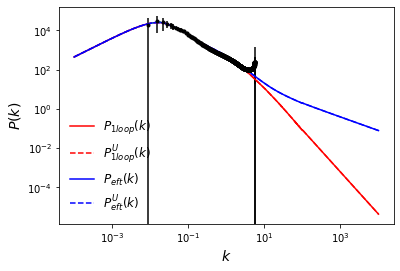

In [11]:
# Plot
plt.plot(ks,pe, 'r', label='$P_{1loop}(k)$')
plt.plot(ks,pu, 'r--', label='$P^U_{1loop}(k)$')
plt.plot(ks,peft, 'b', label='$P_{eft}(k)$')
plt.plot(ks,pueft, 'b--', label='$P^U_{eft}(k)$')


plt.loglog(k, p, ':')
plt.errorbar(k, p, yerr=err, fmt=".k", capsize=0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$P(k)$', fontsize=14)
plt.legend(loc='lower left', fontsize=12, frameon=False);